In [29]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import numpy
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Monte Carlo'

link = 'https://www.ewrc-results.com/results/84715-rallye-automobile-monte-carlo-2024/?s='
startat, no_ss=431142, int(17) # starting number of url, count of Special Stages
canceled = []

stages = [number for number in range(no_ss)]


rally_24 = []
total_24 = []

In [30]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [44]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(ss, val, ss_a, "\n", my_url11)
    
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[1]
#    total = pd.read_html(page_html11)[2]
#    print(total)
    
    data.columns = data.iloc[0]
    data = data[1:]
    data['ss']=ss+1
    #print(data)
'''
   total.columns = total.iloc[0]
    total = total[1:]
    total['ss']=ss+1
    #print(total)

    equal = '-' in data['Pos.'].unique()
   
    if equal:
        data['Pos.'] = data['Pos.'].replace('-', method='ffill')
    '''
    #data.to_csv('05_rally23_SS'+str(ss+1)+'.csv', index=False)

rally_24.append(data)
    #total_24.append(total)

In [45]:
data

,1.,#11,Neuville Thierry - Wydaeghe M. Hyundai i20 N Rally1,RC1 M,3:09:30.9,NaN,102.7,ss
1,2.,#17,Ogier Sébastien - Landais V. Toyota GR Yaris ...,RC1 M,3:09:47.0,+16.1 +16.1,102.6 0.05,17
2,3.,#33,Evans Elfyn - Martin Scott Toyota GR Yaris Ra...,RC1 M,3:10:16.1,+45.2 +29.1,102.3 0.14,17
3,4.,#8,Tänak Ott - Järveoja Martin Hyundai i20 N Rally1,RC1 M,3:11:30.7,+1:59.8 +1:14.6,101.6 0.37,17
4,5.,#16,Fourmaux Adrien - Coria Alexandre Ford Puma R...,RC1 M,3:13:07.8,+3:36.9 +1:37.1,100.8 0.67,17
5,6.,#9,Mikkelsen Andreas - Eriksen T. Hyundai i20 N ...,RC1 M,3:15:05.5,+5:34.6 +1:57.7,99.8 1.03,17
...,...,...,...,...,...,...,...,...
59,60. −1,#75,Palmero Jean-Paul - Pastorino M. Peugeot 208 ...,RC4,4:36:07.7 0:30,+1:26:36.8 +4.4,70.6 16.0,17
60,61.,#45,Vossen Henk - Vissenberg Willem Hyundai i20 N...,RC2,4:36:31.5 0:10,+1:27:00.6 +23.8,70.4 16.1,17
61,62.,#71,Morini Olivier - Marquez S. Peugeot 208 R2,RC4,4:54:30.6,+1:44:59.7 +17:59.1,66.1 19.4,17
62,63.,#76,Šekuljica Slaven - Petrović D. Renault Clio R...,RC5,4:58:47.8 0:50,+1:49:16.9 +4:17.2,65.3 20.2,17


In [23]:
rally2024_stages = pd.concat(rally_24, axis=0)
#rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(str).astype(int)
rally2024_stages['No.'] = rally2024_stages['No.'].astype(str).astype(int)
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2024_stages = rally2024_stages.fillna("-")
rally2024_stages = rally2024_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2024_stages['Race'] = rallyname
rally2024_stages['Crew'] = rally2024_stages['Crew'].str[:10]
rally2024_stages = rally2024_stages.sort_values(by=['Race', 'ss'])
rally2024_stages['cou']= rally2024_stages.groupby(['Race', 'ss']).cumcount()+1
rally2024_stages

KeyError: 'No.'

In [25]:
rally2024_stageClass=rally2024_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'SS time', 'cou'], axis=1)
rally2024_stageTimes=rally2024_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'Pos.', 'cou'], axis=1)
rally2024_ClassView = rally2024_stageClass.set_index(['No.', 'Crew','Group','ss','Race'], drop=True).unstack('ss')
rally2024_TimeView = rally2024_stageTimes.set_index(['No.', 'Crew','Group', 'ss', 'Race'], drop=True).unstack('ss')
rally2024_ClassView = rally2024_ClassView.fillna("-")
rally2024_TimeView = rally2024_TimeView.fillna("-")
rally2024_stageClass2 = rally2024_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
rally2024_ClassView2 = rally2024_stageClass2.set_index(['No.','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
rally2024_ClassView2 = rally2024_ClassView2.fillna("-")


KeyError: "['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'SS time', 'cou'] not found in axis"

In [26]:
rally2024_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2024_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv',index=False)

NameError: name 'rally2024_ClassView' is not defined

In [27]:
pd.set_option("display.max_columns", None)

dfi.export(rally2024_ClassView2, (str(rallyname) + '_Stages_Classification.png'))


NameError: name 'rally2024_ClassView2' is not defined

In [28]:
rally2024_ClassView

NameError: name 'rally2024_ClassView' is not defined

In [9]:
rally2023_stages[['time_hh', 'time_mm','time_ss']] = rally2023_stages['SS time'].str.split(':', expand=True)
rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_hh']*3600 + rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'SS time', 'Aver. speed sec/km',  'Diff.Leader Diff.Prev.', 'time_hh', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,No.,Crew,Group,ss,Race,cou,time_SS_sec
1,11,Neuville,RC1,1,Central European,1,107.6
2,4,Lappi Esa,RC1,1,Central European,2,108.3
3,8,Tänak Ott,RC1,1,Central European,3,109.0
4,6,Sordo Dan,RC1,1,Central European,4,109.4
5,18,Katsuta T,RC1,1,Central European,5,110.7
...,...,...,...,...,...,...,...
24,46,Hagiwara,-,22,Central European,24,417.2
25,44,Nakayama,-,22,Central European,25,418.4
26,49,Aihara Ta,-,22,Central European,26,435.7
27,48,Shimizu H,-,22,Central European,27,443.5


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
min_value_G = rally2023_stages.groupby(['Race', 'ss', 'Group'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)
min_value2_G =  pd.DataFrame(min_value_G)

min_value2_G = min_value2_G.rename(columns={'time_SS_sec' : 'min_time_Gr'})
min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2_G

min_time_Gr
Race             ss Group             
Central European 1  -            122.3
                    RC1          107.6
                    RC2          112.9
                    RC3          141.0
                    RC4          124.6
...                                ...
                 22 RC1          288.8
                    RC2          310.2
                    RC3          360.7
                    RC4          337.5
                    RC5          388.4

[126 rows x 1 columns]

In [11]:
ss_times_F_G = rally2023_stages.merge(min_value2_G, on=['Race', 'ss', 'Group'])
ss_times_F = ss_times_F_G.merge(min_value2, on=['Race', 'ss'])
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time_Gr,min_time
0,11,Neuville,RC1,1,Central European,1,107.6,107.6,107.6
1,4,Lappi Esa,RC1,1,Central European,2,108.3,107.6,107.6
2,8,Tänak Ott,RC1,1,Central European,3,109.0,107.6,107.6
3,6,Sordo Dan,RC1,1,Central European,4,109.4,107.6,107.6
4,18,Katsuta T,RC1,1,Central European,5,110.7,107.6,107.6
...,...,...,...,...,...,...,...,...,...
674,49,Aihara Ta,-,22,Central European,26,435.7,343.7,288.8
675,48,Shimizu H,-,22,Central European,27,443.5,343.7,288.8
676,45,Takata Ko,-,22,Central European,28,452.3,343.7,288.8
677,31,Bailey Ja,RC3,22,Central European,19,360.7,360.7,288.8


In [12]:
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F['diff_Gr']=ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr']
ss_times_F['diff_Gr%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr'])/ss_times_F['min_time_Gr']*100
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time_Gr,min_time,diff,diff%,SS.,diff_Gr,diff_Gr%
0,11,Neuville,RC1,1,Central European,1,107.6,107.6,107.6,0.0,0.000000,01,0.0,0.000000
1,4,Lappi Esa,RC1,1,Central European,2,108.3,107.6,107.6,0.7,0.650558,01,0.7,0.650558
2,8,Tänak Ott,RC1,1,Central European,3,109.0,107.6,107.6,1.4,1.301115,01,1.4,1.301115
3,6,Sordo Dan,RC1,1,Central European,4,109.4,107.6,107.6,1.8,1.672862,01,1.8,1.672862
4,18,Katsuta T,RC1,1,Central European,5,110.7,107.6,107.6,3.1,2.881041,01,3.1,2.881041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,49,Aihara Ta,-,22,Central European,26,435.7,343.7,288.8,146.9,50.865651,22,92.0,26.767530
675,48,Shimizu H,-,22,Central European,27,443.5,343.7,288.8,154.7,53.566482,22,99.8,29.036951
676,45,Takata Ko,-,22,Central European,28,452.3,343.7,288.8,163.5,56.613573,22,108.6,31.597323
677,31,Bailey Ja,RC3,22,Central European,19,360.7,360.7,288.8,71.9,24.896122,22,0.0,0.000000


In [13]:
Group = 'RC1'
#ss_times_WRC = ss_times_F[ss_times_F['Group'].str.contains(Group)]
ss_times_WRC = ss_times_F[ss_times_F['Group'].str.contains('|'.join(['RC1', 'RC2']))]
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time_Gr,min_time,diff,diff%,SS.,diff_Gr,diff_Gr%
0,11,Neuville,RC1,1,Central European,1,107.6,107.6,107.6,0.0,0.000000,01,0.0,0.000000
1,4,Lappi Esa,RC1,1,Central European,2,108.3,107.6,107.6,0.7,0.650558,01,0.7,0.650558
2,8,Tänak Ott,RC1,1,Central European,3,109.0,107.6,107.6,1.4,1.301115,01,1.4,1.301115
3,6,Sordo Dan,RC1,1,Central European,4,109.4,107.6,107.6,1.8,1.672862,01,1.8,1.672862
4,18,Katsuta T,RC1,1,Central European,5,110.7,107.6,107.6,3.1,2.881041,01,3.1,2.881041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,26,Fukunaga,RC2,22,Central European,11,337.0,310.2,288.8,48.2,16.689751,22,26.8,8.639587
662,30,Imai Sato,RC2,22,Central European,13,339.7,310.2,288.8,50.9,17.624654,22,29.5,9.509994
663,25,Chwist Da,RC2,22,Central European,14,340.2,310.2,288.8,51.4,17.797784,22,30.0,9.671180
664,28,Boland Ea,RC2,22,Central European,17,352.9,310.2,288.8,64.1,22.195291,22,42.7,13.765313


In [14]:
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time_Gr,min_time,diff,diff%,SS.,diff_Gr,diff_Gr%
0,11,Neuville,RC1,1,Central European,1,107.6,107.6,107.6,0.0,0.000000,01,0.0,0.000000
1,4,Lappi Esa,RC1,1,Central European,2,108.3,107.6,107.6,0.7,0.650558,01,0.7,0.650558
2,8,Tänak Ott,RC1,1,Central European,3,109.0,107.6,107.6,1.4,1.301115,01,1.4,1.301115
3,6,Sordo Dan,RC1,1,Central European,4,109.4,107.6,107.6,1.8,1.672862,01,1.8,1.672862
4,18,Katsuta T,RC1,1,Central European,5,110.7,107.6,107.6,3.1,2.881041,01,3.1,2.881041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,26,Fukunaga,RC2,22,Central European,11,337.0,310.2,288.8,48.2,16.689751,22,26.8,8.639587
662,30,Imai Sato,RC2,22,Central European,13,339.7,310.2,288.8,50.9,17.624654,22,29.5,9.509994
663,25,Chwist Da,RC2,22,Central European,14,340.2,310.2,288.8,51.4,17.797784,22,30.0,9.671180
664,28,Boland Ea,RC2,22,Central European,17,352.9,310.2,288.8,64.1,22.195291,22,42.7,13.765313


In [15]:
ss_times_F3 =ss_times_WRC.drop(['Group','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_Gr', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race       Central European                                                   \
SS.                      01     02     03     05     06     07     08     09   
Crew                                                                           
Boland  Ea             12.5   55.2   69.0  151.2   82.3  120.3   10.5  110.2   
Chwist  Da              8.0   55.2   93.6  164.0   85.2   92.6   20.4   86.1   
Díaz Aboit             11.3   55.2  179.9  284.1  165.2  184.2  600.0  186.8   
Evans  Elf              4.9    0.0    0.0   18.8    0.3    1.1    2.0    3.1   
Fourmaux                4.5  600.0  600.0  600.0  600.0  600.0  600.0    NaN   
Fukunaga               10.2   55.2   47.9  113.6   78.3   87.3    9.3   87.7   
Gryazin  N              0.0    7.8   30.9    0.0    9.4    8.9    0.1    4.3   
Imai  Sato             11.8   55.2   99.7  206.3  126.4  156.6   13.9  600.0   
Kajetanowi              2.2   55.2   85.2   73.5   40.1   59.0    1.4   62.9   
Katsuta  T              3.1  150.8  110.1    0.0    0.0    0.0    1.0    0.0   
Kovalainen              3.4   51.0   50.3   43.2   23.6   30.6    1.4   48.6   
Lappi  Esa              0.7   82.0   65.2   62.5   20.1   20.9    0.0    9.8   
Mikkelsen               1.3    0.0    0.0   15.8    8.2    2.4    0.0    2.1   
Munster  G              4.5    7.8   18.3    0.3    0.0    0.0    1.6    0.0   
Neuville                0.0   20.8   10.1    3.3  600.0  600.0  600.0    4.8   
Ogier  S.               4.7    4.0   38.8   16.2    4.7    7.6    1.0    0.0   
Rovanperä               4.0   32.3   65.0   24.2   16.8   10.2    1.2   14.4   
Sordo  Dan              1.8  600.0  600.0  600.0  600.0  600.0  600.0    NaN   
Tänak  Ott              1.4   33.4  164.2   32.2   32.5   45.1    1.1    4.2   

Race                                                                      \
SS.            10     11     12     13     14     15     16    17     18   
Crew                                                                       
Boland  Ea   64.8   22.1   21.0   95.0   64.2   21.5   14.2  31.9  133.4   
Chwist  Da   57.2   14.1   15.0   88.2   65.7   26.9    8.3  32.0  136.2   
Díaz Aboit  128.1   30.7   22.0  191.7  144.7   39.0   24.3  80.1  354.8   
Evans  Elf   23.0    0.0    0.0   13.5   41.3    1.4    2.9   4.1   10.6   
Fourmaux      NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN    NaN   
Fukunaga     49.6   14.2   15.0   66.2   63.2   17.1   13.1  27.4  115.5   
Gryazin  N    7.5    0.0    0.0    0.0   15.5    3.7    0.4   3.6   22.8   
Imai  Sato  600.0  600.0  600.0  600.0  600.0  600.0  600.0  41.4  175.0   
Kajetanowi   36.4    1.7    0.7   40.3   40.3    4.9    1.7  22.1  114.3   
Katsuta  T    0.0    2.2    2.7    0.0    0.0    0.0    2.6   2.1    6.1   
Kovalainen   48.5    6.9    6.0   25.3  600.0  600.0  600.0   NaN    NaN   
Lappi  Esa   13.9    2.7    2.2    9.8   10.3    1.5    0.0   4.1   19.1   
Mikkelsen     0.0    0.1    0.4    6.5    8.4    0.0    0.0   1.7    0.0   
Munster  G    0.5    0.7    0.0   15.7    0.0    1.3    2.8   0.0   21.0   
Neuville      1.1    0.4    1.8    4.8    0.8    5.6    2.1   0.0    0.0   
Ogier  S.     9.7    0.8    1.2    2.8   29.9    2.3    3.6   5.9   16.8   
Rovanperä    12.5    1.7    1.6   10.7   13.3    0.4    4.6   5.2   19.0   
Sordo  Dan    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN    NaN   
Tänak  Ott    2.1    0.2    0.9    4.2    2.7    1.9    1.5   7.4   15.3   

Race                                  
SS.            19     20    21    22  
Crew                                  
Boland  Ea   62.0  107.8  35.9  42.7  
Chwist  Da   57.0  120.0  26.4  30.0  
Díaz Aboit  147.0  250.7  98.9  60.8  
Evans  Elf   11.3   18.4  10.8  13.3  
Fourmaux      NaN    NaN   NaN   NaN  
Fukunaga     64.3   91.0  35.2  26.8  
Gryazin  N    5.6   18.2   0.0   0.0  
Imai  Sato   82.0  179.8  74.4  29.5  
Kajetanowi   34.1   76.0  14.7   8.3  
Katsuta  T    0.0   13.4   0.0   7.0  
Kovalainen    NaN    NaN   NaN   NaN  
Lappi  Esa    9.7   

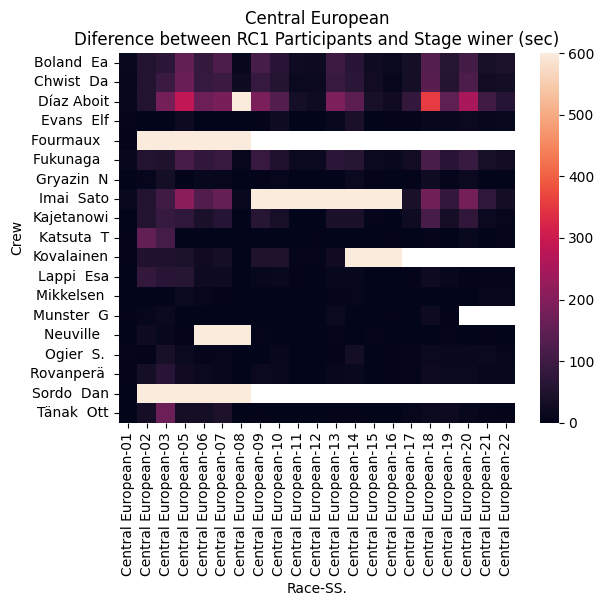

In [16]:
Heatmap_ALL = sns.heatmap(ss_times_F4)
plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
plt.savefig("Heatmap_" + Group + ".png")

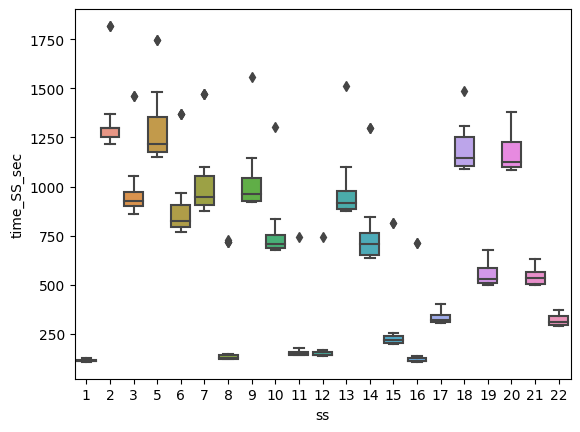

In [17]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])
#plt.savefig("Boxplot__" + Group + ".png")

Text(0.5, 1.0, 'Central European\nDiference between RC1 Participants and Stage winer (%)')

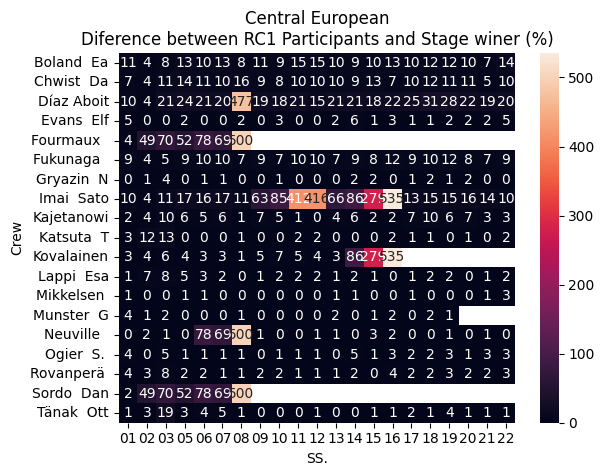

In [18]:
ss_timesa = pd.pivot_table(ss_times_WRC, values='diff_Gr%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between ' + Group + ' Participants and Stage winer (%)')
#plt.savefig( Group + ".jpg")